In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [2]:
data=pd.read_csv("D:\\pandora\Cdac Final Project\Loan\Loan default.csv")

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,37822187,NaN,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,37741884,NaN,2500.0,2500.0,2500.0,36 months,11.99,83.03,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,37854444,NaN,16000.0,16000.0,16000.0,60 months,11.44,351.40,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,36804663,NaN,23325.0,23325.0,23325.0,36 months,14.31,800.71,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,37642222,NaN,5250.0,5250.0,5250.0,36 months,11.44,172.98,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646774e+06,1.646421e+06,1.646749e+06,1.646778e+06,...,5778.0,5778.000000,5778.0,5778.000000,4822.000000,5778.000000,5778.000000,13290.000000,13290.000000,13290.000000
mean,NaN,1.473331e+04,1.472608e+04,1.470244e+04,1.321857e+01,4.394122e+02,7.730483e+04,1.852473e+01,3.344311e-01,6.957068e+02,...,3.0,151.587664,3.0,11.108688,446.130348,11607.266805,185.757715,5389.960476,48.485745,10.579910
std,NaN,8.803698e+03,8.800813e+03,8.805917e+03,4.704294e+00,2.592256e+02,1.207276e+05,1.098422e+01,9.048755e-01,3.130254e+01,...,0.0,123.463493,0.0,10.287269,361.855546,7459.800633,199.735241,3831.509446,8.995510,8.853511
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.320000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,82.960000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.760000e+00,2.517700e+02,4.600000e+04,1.207000e+01,0.000000e+00,6.700000e+02,...,3.0,58.932500,3.0,0.000000,173.347500,5709.287500,27.100000,2488.140000,45.000000,1.000000
50%,NaN,1.260000e+04,1.260000e+04,1.250000e+04,1.274000e+01,3.770400e+02,6.500000e+04,1.789000e+01,0.000000e+00,6.900000e+02,...,3.0,118.780000,3.0,11.000000,352.635000,10130.580000,123.360000,4515.055000,45.305000,12.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.803400e+02,9.200000e+04,2.432000e+01,0.000000e+00,7.100000e+02,...,3.0,207.650000,3.0,20.000000,606.885000,15993.665000,284.692500,7307.060000,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,4.200000e+01,8.450000e+02,...,3.0,893.050000,3.0,37.000000,2679.150000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [5]:
data.size

247020150

In [6]:
data.drop(['policy_code'],inplace=True,axis=1)

In [7]:
print(data['loan_status'].value_counts(dropna=False))
label=list(data['loan_status'].value_counts(dropna=False).index)
value=list(data['loan_status'].value_counts(dropna=False))
print(label,value)

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
NaN                                                        23
Name: loan_status, dtype: int64
['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Default', nan] [788950, 646902, 168084, 23763, 10474, 5786, 1988, 761, 70, 23]


In [8]:
value=[788950, 646902, 168084,23]
explode=(0.1,0,0,0)

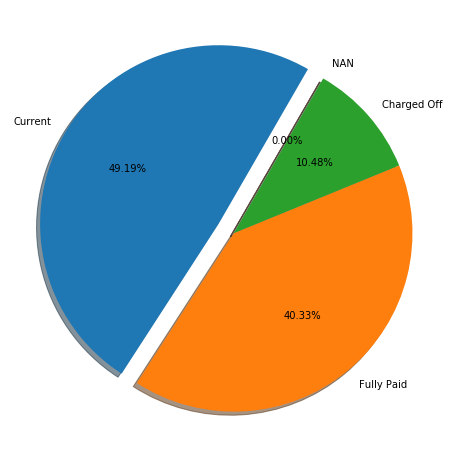

In [9]:
fig1, ax1 = plt.subplots(figsize=(8,10))

ax1.pie(value,explode=explode,labels=['Current','Fully Paid','Charged Off','NAN'],autopct='%1.2f%%',
        shadow=True, startangle=60)

plt.show()

Text(0, 0.5, 'feature count')

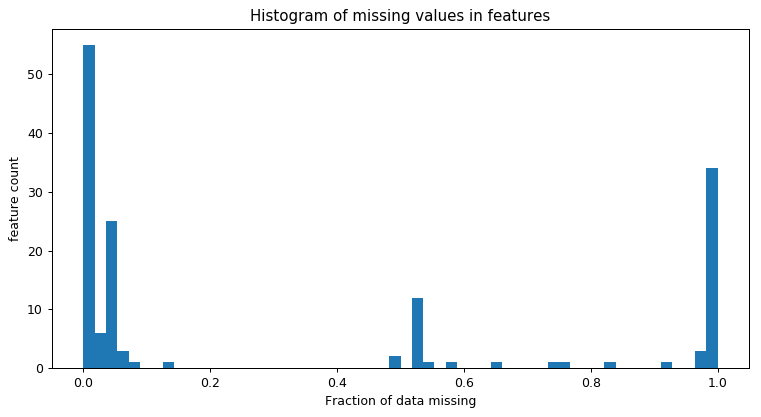

In [10]:
missing_fractions = data.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,5),dpi=90)
missing_fractions.plot.hist(bins=56)
plt.title('Histogram of missing values in features')
plt.xlabel('Fraction of data missing')
plt.ylabel('feature count')

In [11]:
drop_list = list(missing_fractions[missing_fractions > 0.5].index)
print(drop_list)

['member_id', 'orig_projected_additional_accrued_interest', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'hardship_start_date', 'hardship_amount', 'deferral_term', 'hardship_status', 'hardship_reason', 'hardship_type', 'sec_app_mths_since_last_major_derog', 'settlement_percentage', 'settlement_term', 'settlement_status', 'settlement_date', 'settlement_amount', 'debt_settlement_flag_date', 'sec_app_revol_util', 'sec_app_earliest_cr_line', 'sec_app_mort_acc', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'dti_joint', 'annual_inc_joint', 'verification_status_joint', 'desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_rec

In [12]:
len(drop_list)

56

In [13]:

data1 = data.drop(drop_list,axis=1)



In [14]:
data1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,...,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N
1,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N
2,37842129,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,...,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,Cash,N
3,37612354,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,Senior Sales Professional,...,100.0,0.0,0.0,368700.0,18007.0,4400.0,18000.0,N,Cash,N
4,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,...,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,N,Cash,N


In [15]:
len(data1)

1646801

In [16]:
data1.shape

(1646801, 93)

In [17]:
cor=data1.corr()

In [18]:
#cor.iloc[:,:]>0.9
#cor

In [19]:
#from sklearn.decomposition import PCA
['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score'],

(['loan_amnt',
  'term',
  'int_rate',
  'installment',
  'sub_grade',
  'emp_length',
  'home_ownership',
  'annual_inc',
  'loan_status',
  'purpose',
  'addr_state',
  'dti',
  'open_acc',
  'pub_rec',
  'total_acc',
  'application_type',
  'mort_acc',
  'pub_rec_bankruptcies',
  'fico_score'],)

In [20]:
#print(PCA())

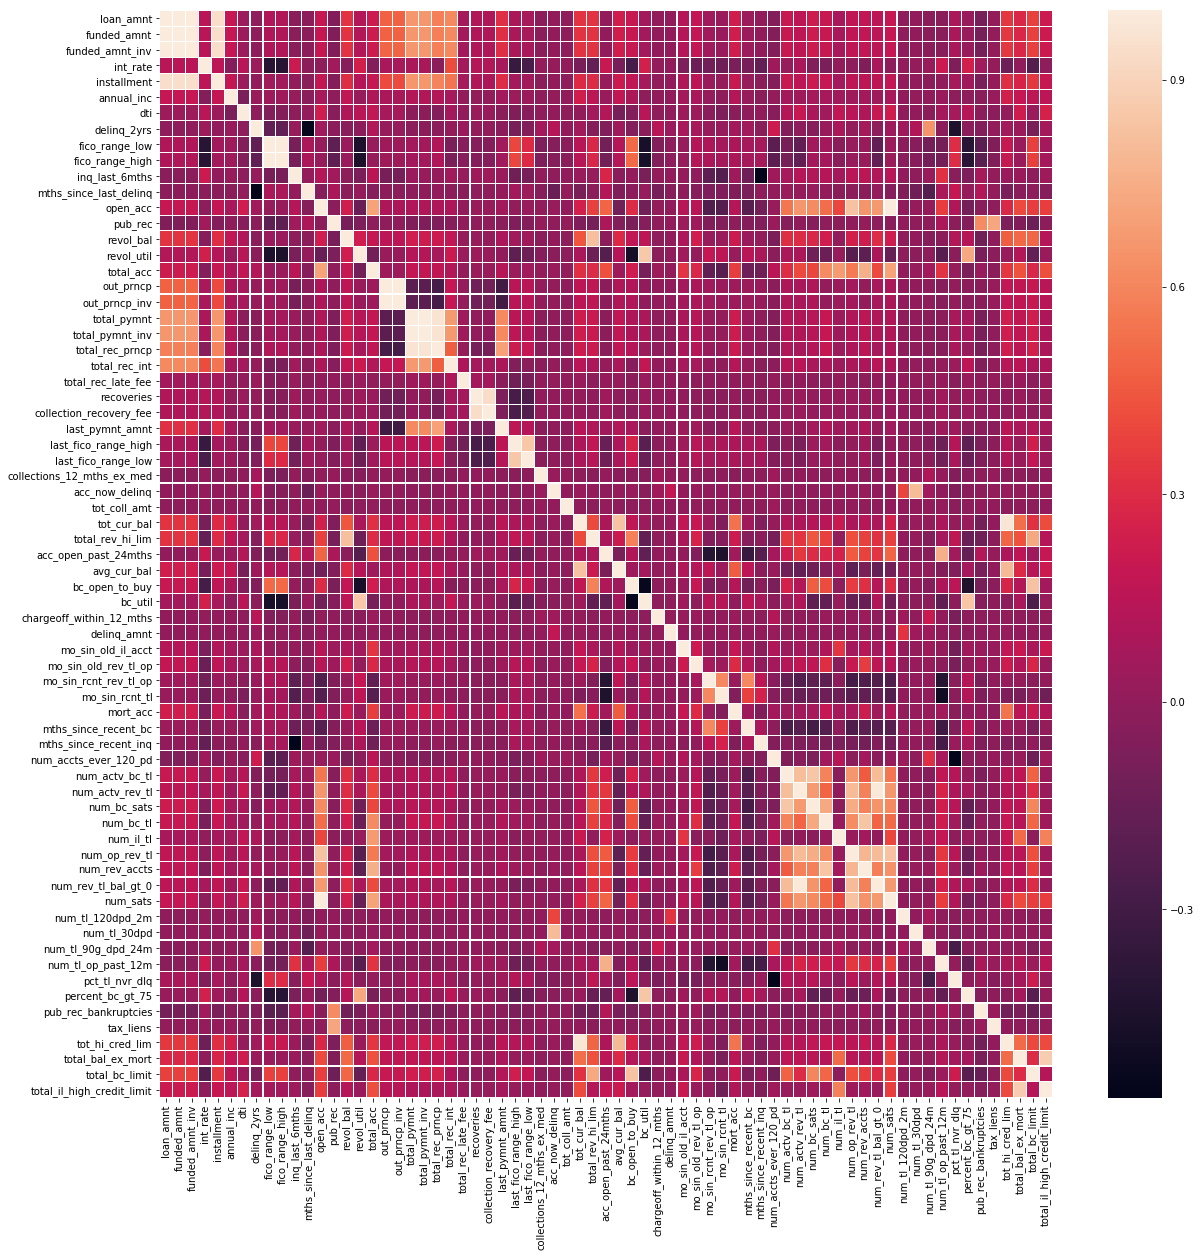

In [21]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cor,ax=ax,linewidth=0.1)

In [22]:
x=data1['id'].head(10)
y=data1['loan_amnt'].head(10)


In [23]:
y1=data1['funded_amnt'].head(10)
y2=data1['funded_amnt_inv'].head(10)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 

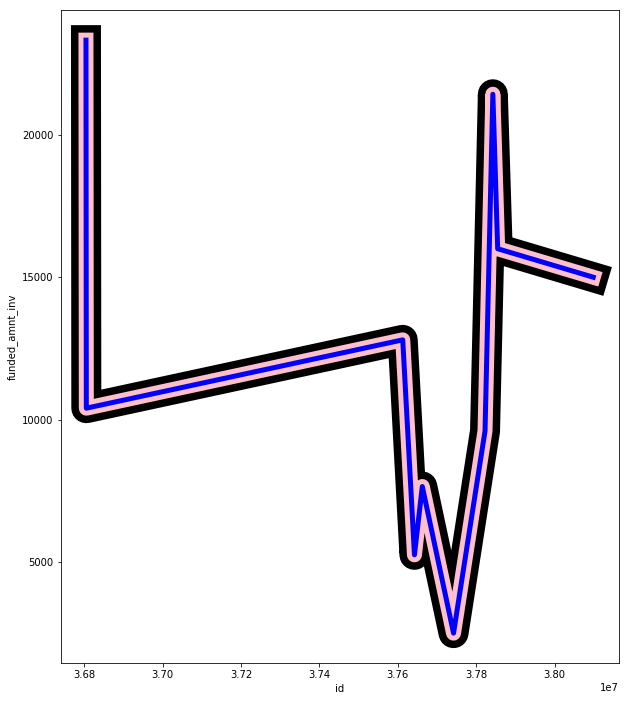

In [24]:
#plt.plot( data1['loan_amnt'].index, 'loan_amnt', data=data1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( data1['loan_amnt'], marker='o', color='olive', linewidth=0.5)
plt.figure(figsize=(10,12))
sns.lineplot(x, y, data=data1,c='black',linewidth=30)
sns.lineplot(x, y1, data=data1,c='pink',linewidth=15)
sns.lineplot(x, y2, data=data1,c='blue',linewidth=5)


So from above plot we are getting that funded_amnt and funded_amnt_inv are highly correlated with loan_amnt. Hence we are droping the feature funded_amnt and funded_amnt_inv.

In [25]:
data1_x1=data1


In [26]:
data1.drop('funded_amnt',axis=1,inplace=True)

In [27]:
#x3=data['id'].head(20)
y3=data['open_acc'].head(10)
print(y3)

0     6.0
1    17.0
2    10.0
3     8.0
4    11.0
5    12.0
6     9.0
7     7.0
8    14.0
9     8.0
Name: open_acc, dtype: float64


In [28]:
y4=data['num_sats'].head(10)
print(y4)

0     6.0
1    17.0
2    10.0
3     8.0
4    11.0
5    12.0
6     9.0
7     7.0
8    14.0
9     8.0
Name: num_sats, dtype: float64


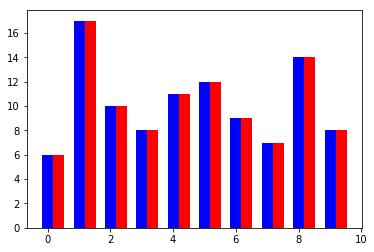

In [29]:
 #ax.bar(x, y3, data=data1)
 #ax.barplot(x, y4, data=data1)
fig, ax = plt.subplots()
bar_width = 0.35
ax.bar(y3.index,y3,bar_width,color='blue')
ax.bar(y4.index+bar_width,y4,bar_width,color='red')
plt.show()

In [30]:
data1['loan_status'].value_counts(dropna=False)

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
NaN                                                        23
Name: loan_status, dtype: int64

In [31]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [32]:
Feature_list = ['id','annual_inc','emp_title','emp_length','home_ownership','addr_state','zip_code','dti','fico_range_low','fico_range_high','earliest_cr_line',"open_acc",'total_acc','revol_bal','revol_util','inq_last_6mths','delinq_amnt','delinq_2yrs','mths_since_last_delinq','pub_rec','mths_since_last_record','mths_since_last_major_derog','application_type','loan_amnt','loan_status','int_rate','grade','sub_grade','installment','purpose','title','term','verification_status','issue_d','inital_list_status','mort_acc','pub_rec_bankruptcies']

In [33]:
len(Feature_list)

37

In [34]:
data1_x=data1

In [35]:
full_list = list(data1.columns)
full_list

['id',
 'loan_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',


In [36]:
for x in Feature_list:
    for y in full_list:
        if y == x:
            full_list.remove(y)

In [37]:
data1.drop(labels=full_list,axis=1,inplace=True)
print(data1.columns)


Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'application_type', 'delinq_amnt',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')


In [38]:
data1.shape

(1646801, 34)

In [39]:
data1 = data1.loc[data1['loan_status'].isin(['Fully Paid','Charged Off'])]

In [40]:
data1['loan_status'].value_counts(dropna=False)

Fully Paid     646902
Charged Off    168084
Name: loan_status, dtype: int64

In [41]:
data1.shape

(814986, 34)

In [42]:
data1['loan_status']

0           Fully Paid
1          Charged Off
2           Fully Paid
4          Charged Off
5           Fully Paid
6           Fully Paid
7           Fully Paid
8          Charged Off
9           Fully Paid
10         Charged Off
11         Charged Off
12          Fully Paid
14          Fully Paid
15          Fully Paid
16          Fully Paid
17          Fully Paid
18          Fully Paid
22          Fully Paid
23          Fully Paid
24          Fully Paid
25          Fully Paid
26          Fully Paid
27         Charged Off
28          Fully Paid
29          Fully Paid
31         Charged Off
32          Fully Paid
33          Fully Paid
34          Fully Paid
36          Fully Paid
              ...     
1646718    Charged Off
1646721    Charged Off
1646722    Charged Off
1646723     Fully Paid
1646724     Fully Paid
1646726     Fully Paid
1646728     Fully Paid
1646732     Fully Paid
1646737    Charged Off
1646739     Fully Paid
1646740     Fully Paid
1646744     Fully Paid
1646749    

In [43]:
data1['loan_status'].value_counts(dropna=True,normalize=True)

Fully Paid     0.793758
Charged Off    0.206242
Name: loan_status, dtype: float64

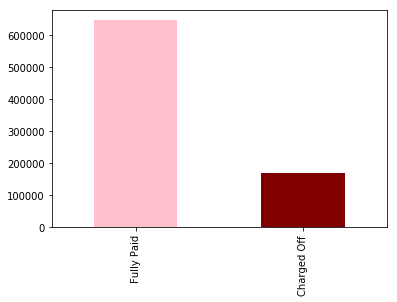

In [44]:
data1['loan_status'].value_counts().plot(kind='bar',color=['pink','maroon'])


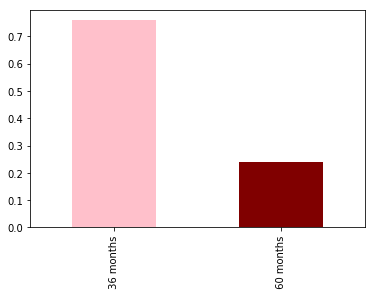

In [45]:
data1['term'].value_counts(normalize=True).plot(kind='bar',color=['pink','maroon'],stacked=True)


# Exploratory Data Analysis

# Id

In [46]:
data1['id'].head(5)

0    38098114
1    36805548
2    37842129
4    37662224
5    37822187
Name: id, dtype: object

In [47]:
data1['id'].describe()

count       814986
unique      814986
top       14680062
freq             1
Name: id, dtype: int64

In [48]:
# Since all values are unique we drop the feature

In [49]:
data1.drop(['id'],inplace=True,axis=1)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Loan Amount

In [50]:
data1['loan_amnt'].describe()

count    814986.000000
mean      14315.458210
std        8499.799241
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

500.0
40000.0
12000.0


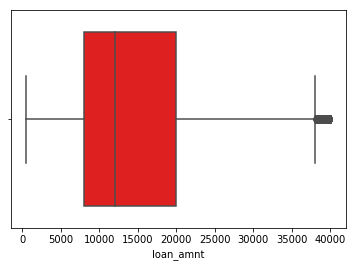

In [51]:
print(data1['loan_amnt'].min())
print(data1['loan_amnt'].max())
print(data1['loan_amnt'].median())
sns.boxplot(x=data1['loan_amnt'],color='red')



# Debt-to-Income(dti)

Text(0.5, 1.0, 'Debt-to-income Ratio')

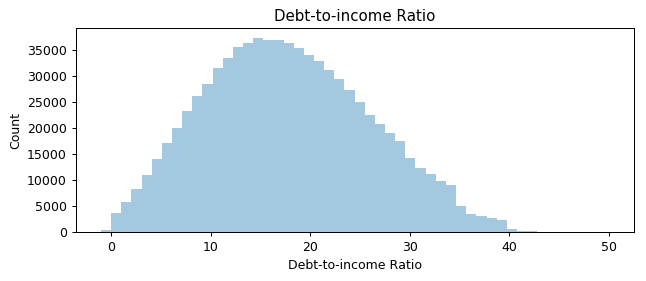

In [52]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(data1.loc[data1['dti'].notnull() & (data1['dti']<50), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

# term

In [53]:
data1['term'].value_counts(dropna=True,normalize=True)

 36 months    0.75886
 60 months    0.24114
Name: term, dtype: float64

In [54]:
data1.groupby('term')['loan_status'].value_counts(dropna=True,normalize=True).loc[:,'Charged Off']

term
 36 months    0.165710
 60 months    0.333793
Name: loan_status, dtype: float64

In [55]:
data1['term'].astype(str)
data1['term'].dtype

dtype('O')

In [56]:
data1['term']=data1.term.str.split(" ").str[1]


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
data1['term'].head()

0    60
1    36
2    60
4    36
5    36
Name: term, dtype: object

In [58]:
data2=data1.groupby('term')
term_x=data1['term'].value_counts()
print(term_x)
term_x.index

36    618460
60    196526
Name: term, dtype: int64


Index(['36', '60'], dtype='object')

In [59]:
term_y1=(data2['loan_status'].value_counts().loc[:,'Charged Off'])
print(term_y1)
print(term_y1.index)

term
36    102485
60     65599
Name: loan_status, dtype: int64
Index(['36', '60'], dtype='object', name='term')


In [60]:
term_y2=(data2['loan_status'].value_counts().loc[:,'Fully Paid'])
print(term_y2)

term
36    515975
60    130927
Name: loan_status, dtype: int64


In [61]:
'''
fig, ax = plt.subplots()
bar_width = 0.35
opacity=0.65
leg=['Total','Charged Off','Fully Paid']
ax.bar(term_x.index,term_x,bar_width,color='blue')
ax.bar(term_x.index,term_y1,bar_width,color='red')
ax.bar(term_x.index,term_y2,bar_width,color='pink',alpha=opacity)
plt.legend(leg)
plt.show()
'''

"\nfig, ax = plt.subplots()\nbar_width = 0.35\nopacity=0.65\nleg=['Total','Charged Off','Fully Paid']\nax.bar(term_x.index,term_x,bar_width,color='blue')\nax.bar(term_x.index,term_y1,bar_width,color='red')\nax.bar(term_x.index,term_y2,bar_width,color='pink',alpha=opacity)\nplt.legend(leg)\nplt.show()\n"

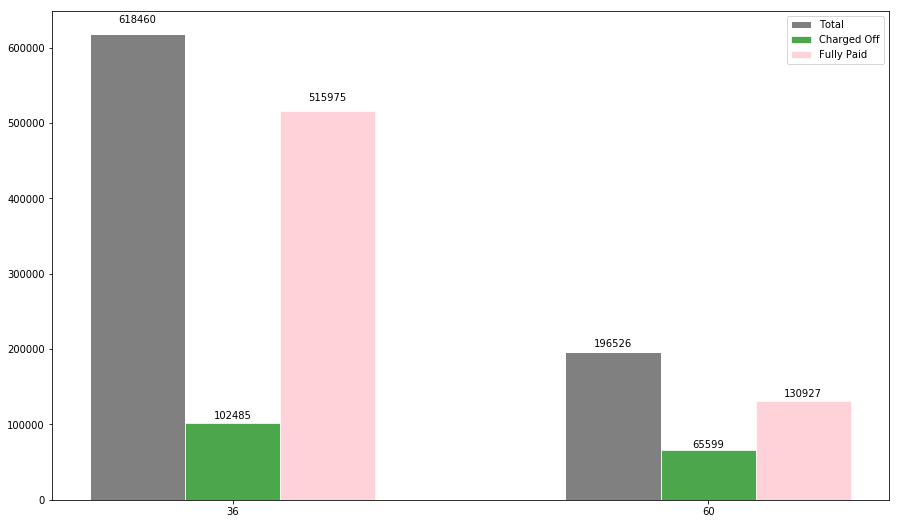

In [62]:
from pylab import rcParams
rcParams['figure.figsize']=15,9
term_x_list=list(term_x)
term_y1_list=list(term_y1)
term_y2_list=list(term_y2)
opacity=0.7
bar_width = 0.2
fig, ax = plt.subplots()
r1 = np.arange(len(term_x_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
#plt.figure(figsize=(20,15))
a=ax.bar(r1,term_x_list, color='grey', width=bar_width, edgecolor='white', label='Total')
b=ax.bar(r2, term_y1_list, color='green', width=bar_width, edgecolor='white', label='Charged Off',alpha=opacity)
c=ax.bar(r3, term_y2_list, color='pink', width=bar_width, edgecolor='white', label='Fully Paid',alpha=opacity)

plt.xticks([r + bar_width for r in range(len(term_x_list))], ['36','60'])
 




def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')


autolabel(a)
autolabel(b)
autolabel(c)
plt.legend()
plt.show()


# int_rate

count    814986.000000
mean         13.490993
std           4.618486
min           5.320000
25%           9.990000
50%          13.110000
75%          16.290000
max          30.990000
Name: int_rate, dtype: float64


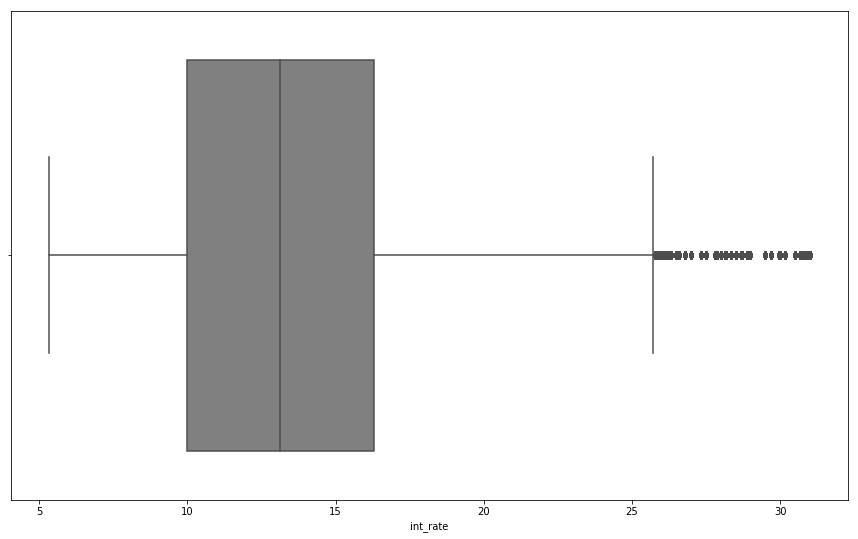

In [63]:
print(data1['int_rate'].describe())
sns.boxplot(x=data1['int_rate'],color="grey")

                count       mean       std   min    25%    50%    75%    max
loan_status                                                                 
Charged Off  168084.0  15.736335  4.625755  5.32  12.59  15.31  18.55  30.99
Fully Paid   646902.0  12.907587  4.434262  5.32   9.49  12.68  15.61  30.99


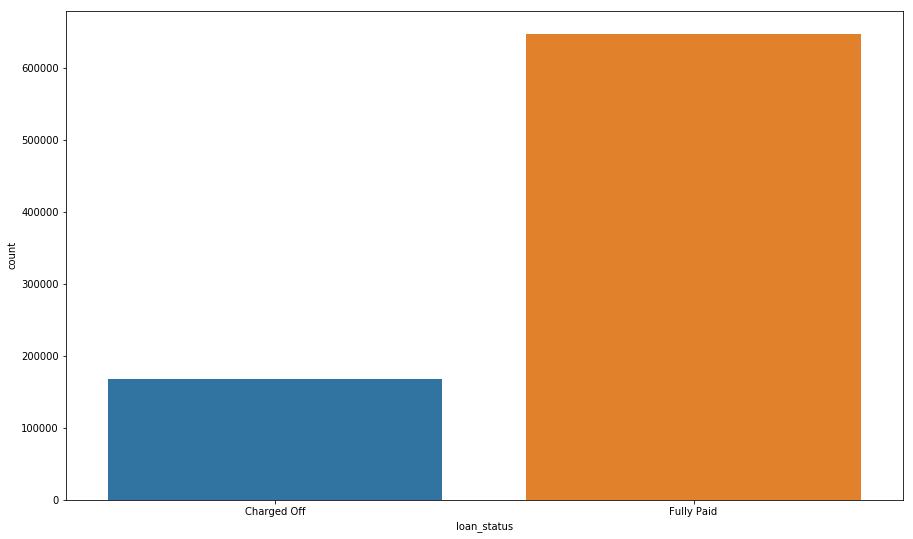

In [64]:
data3 = data1.groupby('loan_status')
intrate=data3['int_rate'].describe()
print(intrate)
sns.barplot(x=intrate.index,y=intrate['count'])

# installment

count    814986.000000
mean        436.749624
std         255.732093
min           4.930000
25%         251.400000
50%         377.040000
75%         576.290000
max        1714.540000
Name: installment, dtype: float64


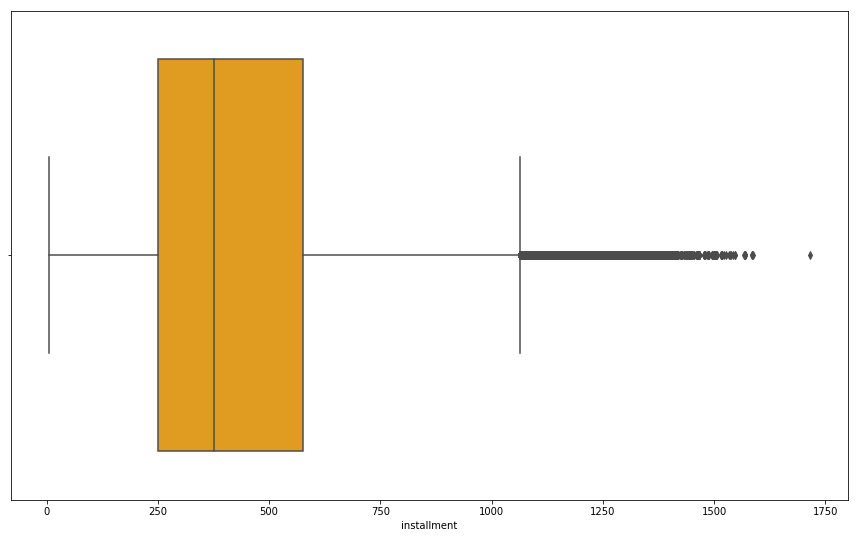

In [65]:
print(data1['installment'].describe())
sns.boxplot(x=data1['installment'],color='orange')

                count        mean         std    min     25%     50%     75%  \
loan_status                                                                    
Charged Off  168084.0  459.973673  255.309267  21.62  276.14  402.39  595.87   
Fully Paid   646902.0  430.715339  255.496761   4.93  244.76  370.92  569.72   

                 max  
loan_status           
Charged Off  1569.11  
Fully Paid   1714.54  


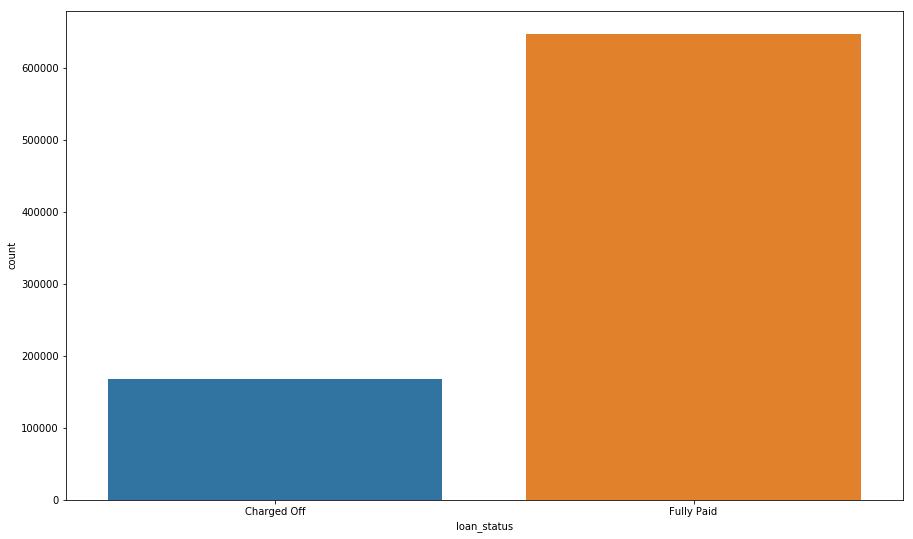

In [66]:
install_data=data1.groupby('loan_status')
install=install_data['installment'].describe()
print(install)
sns.barplot(x=install.index,y=install['count'])

# grade, sub_grade

In [67]:
print(sorted(data1['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


The grade is implied by the subgrade, so let's drop the grade column.

In [68]:
data1.drop('grade', axis=1, inplace=True)

In [69]:
print(sorted(data1['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


Text(0.5, 0, 'Sub_grade')

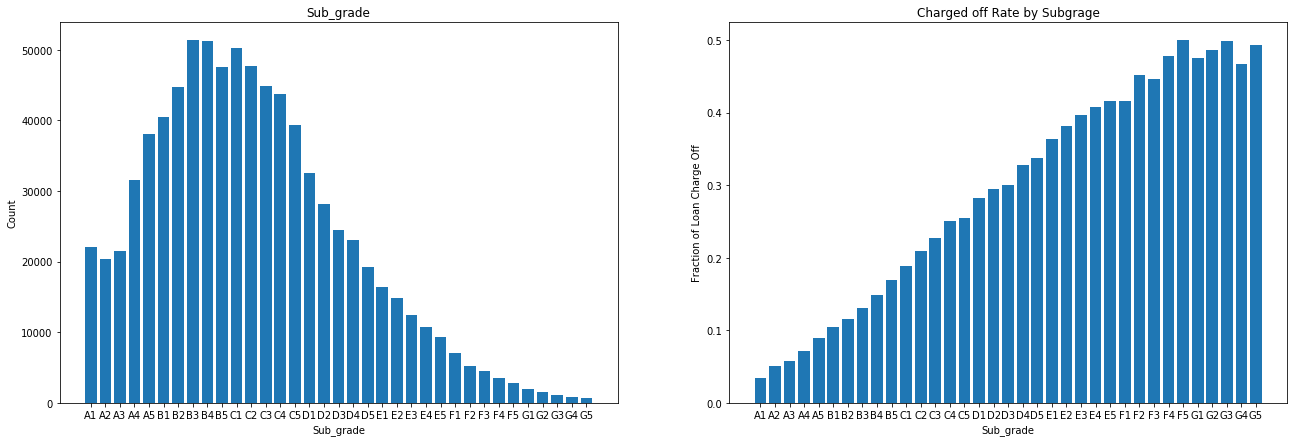

In [70]:
sub_grade_data=data1.groupby('sub_grade')
plt.figure(figsize=(22,7))
sub_plot1=sub_grade_data['loan_status'].count()
sub_plot_C=sub_grade_data['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#print(sub_plot1)
plt.subplot(1,2,1)
plt.bar(sub_plot1.index,sub_plot1)
plt.title("Sub_grade")
plt.ylabel('Count')
plt.xlabel('Sub_grade')
plt.subplot(1,2,2)
plt.bar(sub_plot_C.index,sub_plot_C)
plt.title("Charged off Rate by Subgrage")
plt.ylabel('Fraction of Loan Charge Off')
plt.xlabel('Sub_grade')

# emp_title

In [71]:
data1['emp_title'].describe()

count      766415
unique     280473
top       Teacher
freq        11351
Name: emp_title, dtype: object

In [72]:
data1.drop('emp_title',axis=1,inplace=True)

# emp_length

In [73]:
data1['emp_length'].value_counts(dropna=False)

10+ years    264873
2 years       73493
3 years       64999
< 1 year      64572
1 year        53411
5 years       52149
4 years       48752
NaN           42253
6 years       40290
7 years       39407
8 years       38887
9 years       31900
Name: emp_length, dtype: int64

In [74]:
data1['emp_length'].replace(to_replace='10+ years',value='10 years',inplace=True)
data1['emp_length'].replace(to_replace='< 1 year',value='0 years',inplace=True)


C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [75]:
data1['emp_length'].head(10)

0     10 years
1      8 years
2      6 years
4      0 years
5     10 years
6      0 years
7      6 years
8     10 years
9      2 years
10     8 years
Name: emp_length, dtype: object

In [76]:
data1['emp_length']=data1.emp_length.str.split(" ").str[0]
data1['emp_length'].head(10)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     10
1      8
2      6
4      0
5     10
6      0
7      6
8     10
9      2
10     8
Name: emp_length, dtype: object

In [77]:
def emp_length(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [78]:
data1['emp_length']=data1['emp_length'].apply(emp_length)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
emp_length_data=data1.groupby('emp_length')
emp_length_data_x=emp_length_data 

Text(0, 0.5, 'Percentage of Loan Default')

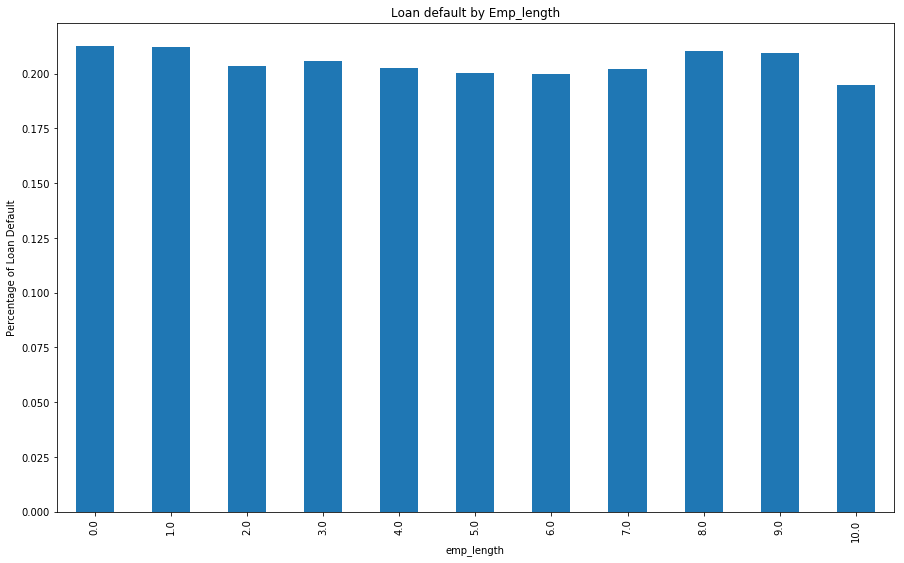

In [80]:
(emp_length_data['loan_status'].value_counts(normalize=True,dropna=True).loc[:,'Charged Off']).plot(kind='bar')
plt.title('Loan default by Emp_length')
plt.ylabel('Percentage of Loan Default')

# Home _ownership

In [81]:
data1['home_ownership'].value_counts(dropna=False)

MORTGAGE    406866
RENT        325071
OWN          82765
OTHER          144
ANY             94
NONE            46
Name: home_ownership, dtype: int64

replace Any and None with Others

In [82]:
data1['home_ownership'].replace(['NONE','ANY'],'OTHER',inplace=True)

In [83]:
home_owner_T=data1['home_ownership'].value_counts(dropna=False).sort_index()
print(home_owner_T)
print(home_owner_T.index)

MORTGAGE    406866
OTHER          284
OWN          82765
RENT        325071
Name: home_ownership, dtype: int64
Index(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype='object')


In [84]:
home_ownership_data=data1.groupby('home_ownership')
home_ownership_data_x = home_ownership_data

In [85]:
home_owner_C=(home_ownership_data['loan_status'].value_counts().loc[:,'Charged Off']).sort_index()
home_owner_C

home_ownership
MORTGAGE    72344
OTHER          50
OWN         17861
RENT        77829
Name: loan_status, dtype: int64

In [86]:
home_owner_F=(home_ownership_data['loan_status'].value_counts().loc[:,'Fully Paid']).sort_index()
home_owner_F

home_ownership
MORTGAGE    334522
OTHER          234
OWN          64904
RENT        247242
Name: loan_status, dtype: int64

From the graph it is quite clear that home owners and renters have a high probability of defaulting on loan.

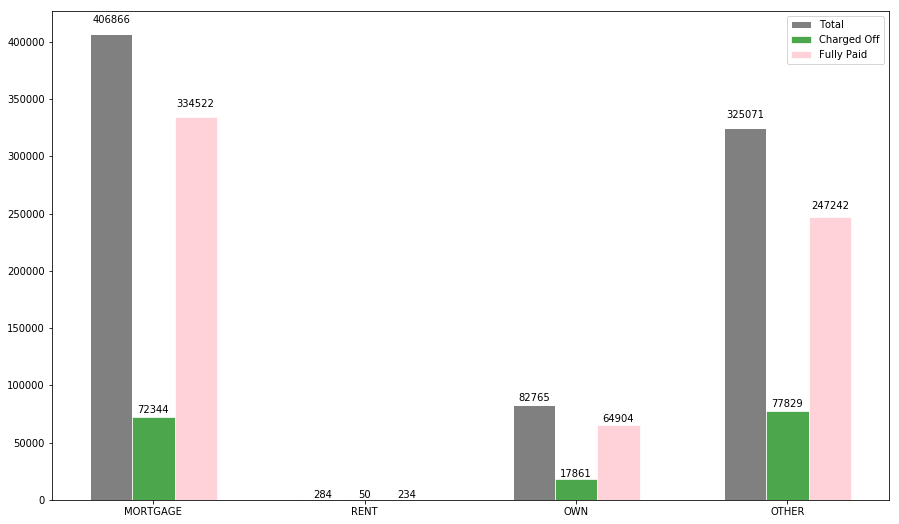

In [87]:
from pylab import rcParams
rcParams['figure.figsize']=15,9
home_owner_T=list(home_owner_T)
home_owner_C=list(home_owner_C)
home_owner_F=list(home_owner_F)
opacity=0.7
bar_width = 0.2
fig, ax = plt.subplots()
r11 = np.arange(len(home_owner_T))
r22 = [x + bar_width for x in r11]
r33 = [x + bar_width for x in r22]
#plt.figure(figsize=(20,15))
a1=ax.bar(r11,home_owner_T, color='grey', width=bar_width, edgecolor='white', label='Total')
b1=ax.bar(r22, home_owner_C, color='green', width=bar_width, edgecolor='white', label='Charged Off',alpha=opacity)
c1=ax.bar(r33, home_owner_F, color='pink', width=bar_width, edgecolor='white', label='Fully Paid',alpha=opacity)

plt.xticks([r + bar_width for r in range(len(home_owner_T))], ['MORTGAGE', 'RENT', 'OWN', 'OTHER'])
 




def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')


autolabel(a1)
autolabel(b1)
autolabel(c1)
plt.legend()
plt.show()


# Purpose

In [88]:
data1['purpose'].value_counts(dropna=False).sort_index()
purpose_data=data1.groupby('purpose')
purpose_x=purpose_data['purpose'].count()
print(purpose_x)

purpose
car                     8936
credit_card           175123
debt_consolidation    481652
educational              326
home_improvement       50793
house                   4095
major_purchase         17463
medical                 8772
moving                  5725
other                  43900
renewable_energy         599
small_business         10214
vacation                5116
wedding                 2272
Name: purpose, dtype: int64


In [89]:
purpose_y1=purpose_data['loan_status'].value_counts().loc[:,'Charged Off'].sort_index()
purpose_y1

purpose
car                     1323
credit_card            31244
debt_consolidation    104710
educational               56
home_improvement        9213
house                    879
major_purchase          3200
medical                 2012
moving                  1391
other                   9525
renewable_energy         148
small_business          3089
vacation                1017
wedding                  277
Name: loan_status, dtype: int64

In [90]:
purpose_y2=purpose_data['loan_status'].value_counts().loc[:,'Fully Paid'].sort_index()
purpose_y2

purpose
car                     7613
credit_card           143879
debt_consolidation    376942
educational              270
home_improvement       41580
house                   3216
major_purchase         14263
medical                 6760
moving                  4334
other                  34375
renewable_energy         451
small_business          7125
vacation                4099
wedding                 1995
Name: loan_status, dtype: int64

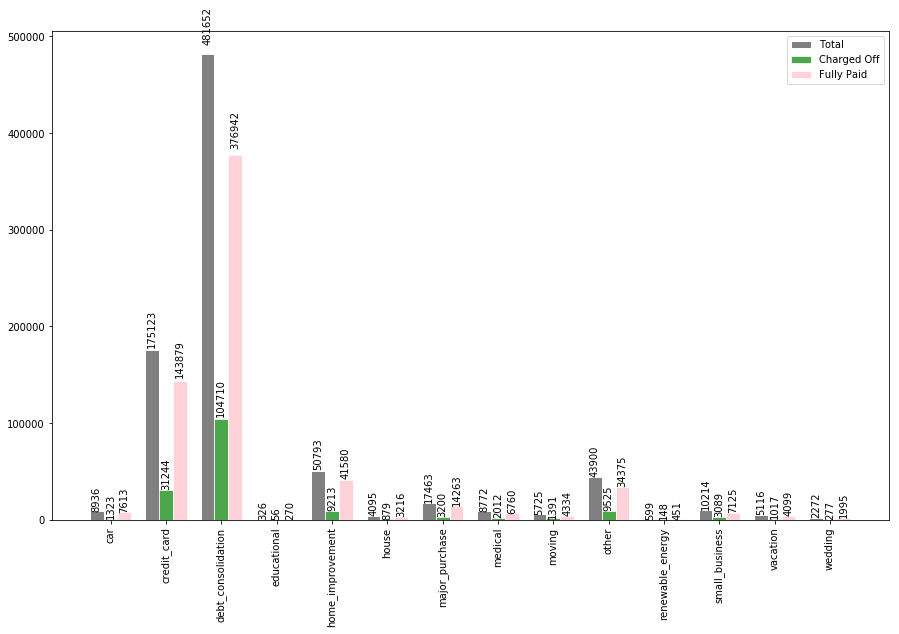

In [91]:
from pylab import rcParams
rcParams['figure.figsize']=15,9
purpose_x_T=list(purpose_x)
purpose_y1_C=list(purpose_y1)
purpose_y2_F=list(purpose_y2)
opacity=0.7
bar_width = 0.25
fig, ax = plt.subplots()
r111 = np.arange(len(purpose_x_T))
r222 = [x + bar_width for x in r111]
r333 = [x + bar_width for x in r222]
#plt.figure(figsize=(20,15))
a11=ax.bar(r111,purpose_x_T, color='grey', width=bar_width, edgecolor='white', label='Total')
b11=ax.bar(r222, purpose_y1_C, color='green', width=bar_width, edgecolor='white', label='Charged Off',alpha=opacity)
c11=ax.bar(r333, purpose_y2_F, color='pink', width=bar_width, edgecolor='white', label='Fully Paid',alpha=opacity)

plt.xticks([r + bar_width for r in range(len(purpose_x_T))],['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],rotation=90)
 




def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom',rotation=90)


autolabel(a11)
autolabel(b11)
autolabel(c11)
plt.legend()
plt.show()


# addr_state

In [92]:
addr_data = data1.groupby('addr_state')
addr_state_T=data1['addr_state'].value_counts(dropna=False).sort_index(ascending=False)
addr_state_C=addr_data['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_index(ascending=False)

Text(0.5, 0, 'Sub_grade')

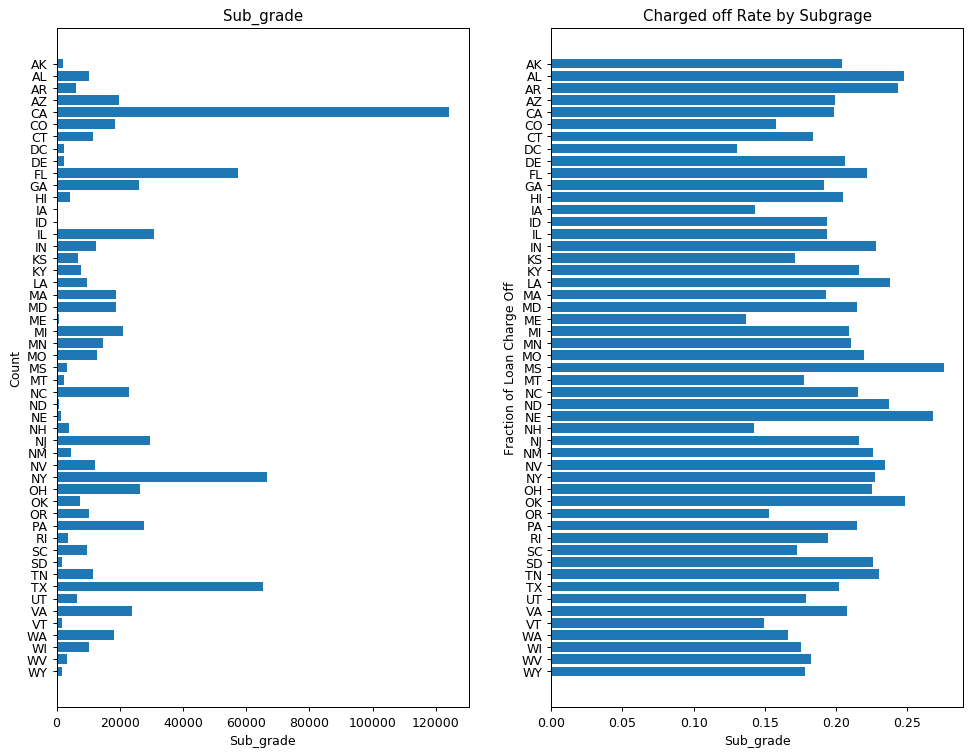

In [93]:
plt.figure(figsize=(13,10),dpi=90)
plt.subplot(1,2,1)
plt.barh(addr_state_T.index,addr_state_T)
plt.title("Sub_grade")
plt.ylabel('Count')
plt.xlabel('Sub_grade')
plt.subplot(1,2,2)
plt.barh(addr_state_C.index,addr_state_C)
plt.title("Charged off Rate by Subgrage")
plt.ylabel('Fraction of Loan Charge Off')
plt.xlabel('Sub_grade')

# Fico_range_low, Fico_range_high

We will keep only one fico score which is the average of the fico_range as both the features are highly correlated

In [94]:
data1['fico_score'] = 0.5*data1['fico_range_high'] + 0.5 * data1['fico_range_low']

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
data1.drop(['fico_range_low','fico_range_high'],axis=1,inplace=True)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


count    814986.000000
mean        697.603208
std          31.352520
min         627.000000
25%         672.000000
50%         692.000000
75%         712.000000
max         847.500000
Name: fico_score, dtype: float64


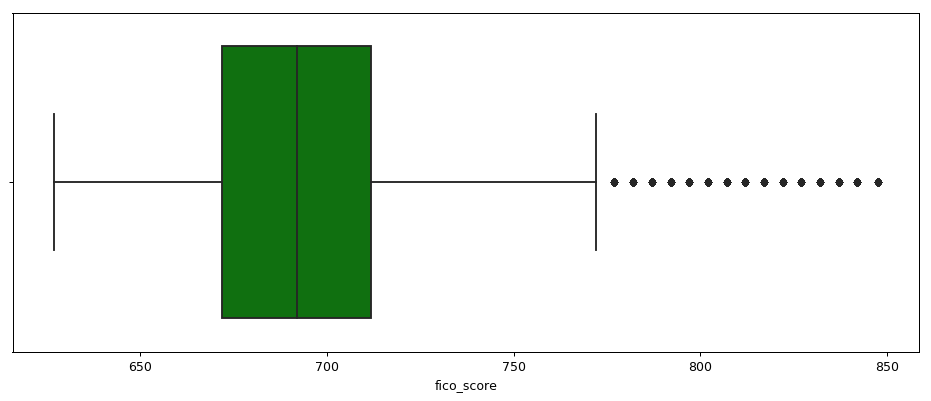

In [96]:
print(data1['fico_score'].describe())
plt.figure(figsize=(13,5),dpi=90)
sns.boxplot(x=data1['fico_score'],color='green')

# pub_rec_bankrupties

In [97]:
data1['pub_rec_bankruptcies'].value_counts(dropna=False).sort_index()

0.0     714642
1.0      93680
2.0       4673
3.0        926
4.0        234
5.0         85
6.0         28
7.0         14
8.0          5
9.0          1
12.0         1
NaN        697
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies
0.0    0.203782
1.0    0.222588
2.0    0.248449
3.0    0.230022
4.0    0.299145
5.0    0.270588
6.0    0.357143
7.0    0.214286
8.0    0.600000
Name: loan_status, dtype: float64


Text(0, 0.5, 'Fraction of loan default')

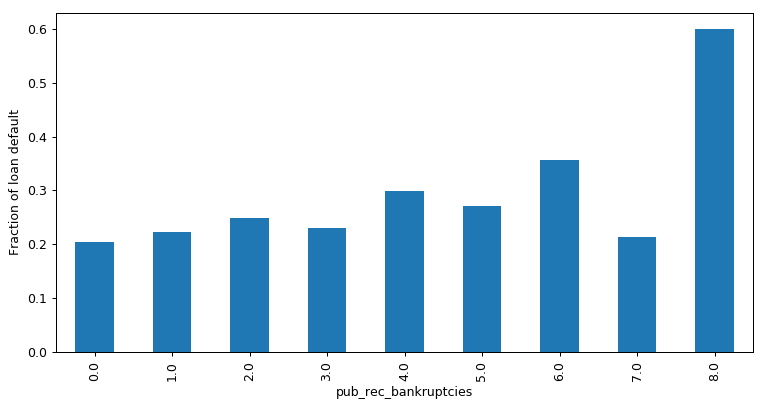

In [98]:
pub_record=data1.groupby('pub_rec_bankruptcies')
pubic_record_x = pub_record
plt.figure(figsize=(10,5),dpi=90)
print(pub_record['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])
(pub_record['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']).plot(kind='bar')
plt.ylabel('Fraction of loan default')

 From the graph it is can be concluded that the people with 8 public bankruptcy record have a high probability of dafaulting

# application_type

In [99]:
app_data = data1['application_type'].value_counts()
app_data

Individual    811207
Joint App       3779
Name: application_type, dtype: int64

In [100]:
app_data_grp= data1.groupby('application_type')
app_data_T=app_data_grp['loan_status'].count()
print(app_data_T)
app_data_C=app_data_grp['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
app_data_C


application_type
Individual    811207
Joint App       3779
Name: loan_status, dtype: int64


application_type
Individual    0.206316
Joint App     0.190262
Name: loan_status, dtype: float64

Text(0.5, 0, 'Sub_grade')

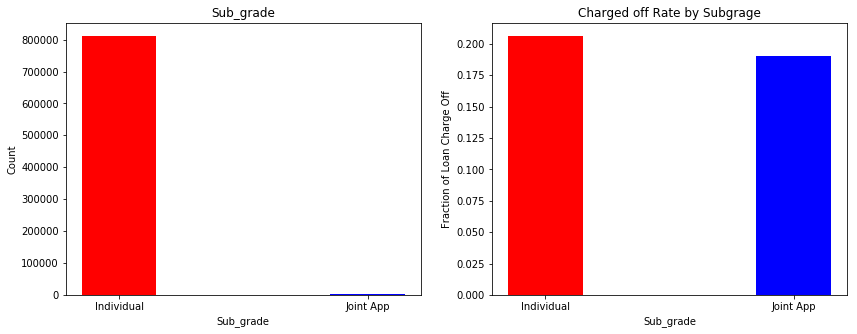

In [101]:

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.bar(app_data.index,app_data,color=['red','blue'],width=0.3)
plt.title("Sub_grade")
plt.ylabel('Count')
plt.xlabel('Sub_grade')
plt.subplot(1,2,2)
plt.bar(app_data_C.index,app_data_C,color=['red','blue'],width=0.3)
plt.title("Charged off Rate by Subgrage")
plt.ylabel('Fraction of Loan Charge Off')
plt.xlabel('Sub_grade')

In [102]:
data1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'application_type', 'delinq_amnt',
       'mort_acc', 'pub_rec_bankruptcies', 'fico_score'],
      dtype='object')

In [103]:
analyse_data=data1

In [104]:
analyse_data.drop([ 'verification_status','issue_d', 'title', 'zip_code',
                   'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'revol_bal',
       'revol_util','delinq_amnt'],axis=1,inplace=True)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [105]:
print(analyse_data.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score'],
      dtype='object')


In [106]:
sample_analysis=analyse_data

In [107]:
sample_analysis.fillna(method='ffill',inplace=True)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [108]:
sample_analysis.to_csv("D:\project.csv")

In [109]:
loan_status=sample_analysis['loan_status']
sample_analysis.drop('loan_status',axis=1,inplace=True)


In [110]:
sample_analysis.head()
print(sample_analysis['application_type'].nunique())
sample_analysis.isna().nunique()

2


loan_amnt               1
term                    1
int_rate                1
installment             1
sub_grade               1
emp_length              1
home_ownership          1
annual_inc              1
purpose                 1
addr_state              1
dti                     1
open_acc                1
pub_rec                 1
total_acc               1
application_type        1
mort_acc                1
pub_rec_bankruptcies    1
fico_score              1
dtype: int64

In [111]:
x = pd.get_dummies(sample_analysis, columns=['sub_grade', 'home_ownership', 'purpose', 'addr_state', 'application_type'],drop_first=True)

In [112]:
x.head()


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,total_acc,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App
0,15000.0,60,12.39,336.64,10.0,78000.0,12.03,6.0,0.0,17.0,...,0,0,0,1,0,0,0,0,0,0
1,10400.0,36,6.99,321.08,8.0,58000.0,14.92,17.0,0.0,36.0,...,0,0,0,0,0,0,0,0,0,0
2,21425.0,60,15.59,516.36,6.0,63800.0,18.49,10.0,0.0,35.0,...,0,0,0,0,0,0,0,0,0,0
4,7650.0,36,13.66,260.20,0.0,50000.0,34.81,11.0,0.0,20.0,...,0,0,0,0,0,0,0,0,0,0
5,9600.0,36,13.66,326.53,10.0,69000.0,25.81,12.0,0.0,44.0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
 y=pd.get_dummies(loan_status, columns=['loan_status'])

In [114]:
y.head(10)

,Charged Off,Fully Paid
0,0,1
1,1,0
2,0,1
4,1,0
5,0,1
6,0,1
7,0,1
8,1,0
9,0,1
10,1,0


In [115]:
y1=pd.get_dummies(loan_status, columns=['loan_status'],drop_first=True)

In [116]:
y1.head(10)

,Fully Paid
0,1
1,0
2,1
4,0
5,1
6,1
7,1
8,0
9,1
10,0


In [117]:
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score,fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [118]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y1,test_size=0.2,random_state=42)

In [119]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [120]:
y_pred = dtc.predict(xtest)
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [121]:
print("Accuracy: ",accuracy_score(y_pred,ytest))
print("f1_score: ",f1_score(y_pred,ytest))
print("Precision: ",precision_score(y_pred,ytest))
print("Recall: ",recall_score(y_pred,ytest))
print("F-Beta Score: ",fbeta_score(ytest, y_pred, beta=0.5))

Accuracy:  0.7011497073583725
f1_score:  0.8104886399004047
Precision:  0.8061355580664634
Recall:  0.8148889897204011
F-Beta Score:  0.8131231284678963


In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
Logic=LogisticRegression()

In [124]:
Logic.fit(xtrain,ytrain)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
logic_pred = Logic.predict(xtest)
np.unique(logic_pred)

array([0, 1], dtype=uint8)

In [126]:
print("Accuracy: ",accuracy_score(logic_pred,ytest))
print("f1_score: ",f1_score(logic_pred,ytest))
print("Precision: ",precision_score(logic_pred,ytest))
print("Recall: ",recall_score(logic_pred,ytest))
print("F-Beta Score: ",fbeta_score(logic_pred,ytest, beta=0.5))

Accuracy:  0.7937213953545442
f1_score:  0.8842872531171169
Precision:  0.9942808054854737
Recall:  0.796205975495634
F-Beta Score:  0.9471554005735643


In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
naive=GaussianNB()

In [129]:
naive.fit(xtrain,ytrain)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [130]:
naive_pred = naive.predict(xtest)

In [131]:
print("Accuracy: ",accuracy_score(naive_pred,ytest))
print("f1_score: ",f1_score(naive_pred,ytest))
print("Precision: ",precision_score(naive_pred,ytest))
print("Recall: ",recall_score(naive_pred,ytest))
print("F-Beta Score: ",fbeta_score(naive_pred,ytest, beta=0.5))

Accuracy:  0.7714879937177144
f1_score:  0.8618757486195733
Precision:  0.8993452721841286
Recall:  0.8274035414990495
F-Beta Score:  0.8839731935707168


In [132]:
current_data = data.loc[data['loan_status'].isin(['Current'])]

In [133]:
current_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
13,37712169,NaN,21075.0,21075.0,21075.0,60 months,21.99,581.95,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
19,37752109,NaN,13550.0,13550.0,13550.0,60 months,19.99,358.92,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
20,36441833,NaN,7200.0,7200.0,7200.0,36 months,12.39,240.49,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
21,37611006,NaN,14000.0,14000.0,14000.0,36 months,10.49,454.97,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
current_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=149)

In [135]:
current_data['fico_score'] = 0.5*current_data['fico_range_high'] + 0.5 * current_data['fico_range_low']

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
current_data1 = current_data.loc[:,['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score']]

In [137]:
#current_data1_x = pd.get_dummies(current_data1, columns=['sub_grade', 'home_ownership', 'purpose', 'addr_state', 'application_type'],drop_first=True)

In [138]:
current_data1.drop('loan_status',inplace=True,axis=1)

In [139]:
#

In [140]:
current_data1['term']=current_data1.term.str.split(" ").str[1]

In [141]:
current_data1['emp_length'].replace(to_replace='10+ years',value='10 years',inplace=True)
current_data1['emp_length'].replace(to_replace='< 1 year',value='0 years',inplace=True)

In [142]:
current_data1['emp_length']=current_data1.emp_length.str.split(" ").str[0]
current_data1['emp_length'].head(10)

3     10
13    10
19     5
20     5
21    10
30     3
35     7
39     3
40    10
43    10
Name: emp_length, dtype: object

In [143]:
#current_data1['emp_length'].replace(to_replace='10+ years',value='10 years',inplace=True)
#current_data1['emp_length'].replace(to_replace='< 1 year',value='0 years',inplace=True)

In [144]:
def emp_length(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])


In [145]:
current_data1['emp_length']=current_data1['emp_length'].apply(emp_length)

In [146]:
current_data1['emp_length'].fillna(method='ffill',inplace=True)

In [147]:
#dtc.predict(current_data1)

In [148]:
current_data1.isna().nunique()

loan_amnt               1
term                    1
int_rate                1
installment             1
sub_grade               1
emp_length              1
home_ownership          1
annual_inc              1
purpose                 1
addr_state              1
dti                     2
open_acc                1
pub_rec                 1
total_acc               1
application_type        1
mort_acc                1
pub_rec_bankruptcies    1
fico_score              1
dtype: int64

In [149]:
current_data1['dti'].fillna(method='ffill',inplace=True)

In [150]:
current_data1.isna().nunique()

loan_amnt               1
term                    1
int_rate                1
installment             1
sub_grade               1
emp_length              1
home_ownership          1
annual_inc              1
purpose                 1
addr_state              1
dti                     1
open_acc                1
pub_rec                 1
total_acc               1
application_type        1
mort_acc                1
pub_rec_bankruptcies    1
fico_score              1
dtype: int64

In [151]:
current_data1

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,open_acc,pub_rec,total_acc,application_type,mort_acc,pub_rec_bankruptcies,fico_score
3,12800.0,60,17.14,319.08,D4,10.0,MORTGAGE,125000.0,car,CA,8.31,8.0,0.0,13.0,Individual,5.0,0.0,667.0
13,21075.0,60,21.99,581.95,E5,10.0,MORTGAGE,55000.0,debt_consolidation,IL,29.50,14.0,0.0,21.0,Individual,1.0,0.0,692.0
19,13550.0,60,19.99,358.92,E3,5.0,OWN,40000.0,debt_consolidation,GA,16.23,8.0,0.0,20.0,Individual,0.0,0.0,692.0
20,7200.0,36,12.39,240.49,C1,5.0,MORTGAGE,84000.0,debt_consolidation,TX,18.79,11.0,0.0,17.0,Individual,1.0,0.0,687.0
21,14000.0,36,10.49,454.97,B3,10.0,OWN,42000.0,credit_card,TX,35.68,13.0,0.0,21.0,Individual,0.0,0.0,732.0
30,15000.0,60,20.99,405.72,E4,3.0,MORTGAGE,48000.0,other,TX,17.53,8.0,0.0,13.0,Individual,1.0,0.0,702.0
35,11175.0,36,19.99,415.25,E3,7.0,RENT,31240.0,debt_consolidation,LA,15.02,9.0,0.0,23.0,Individual,0.0,0.0,662.0
39,28000.0,60,15.59,674.83,D1,3.0,OWN,90000.0,debt_consolidation,CT,14.67,25.0,0.0,49.0,Individual,5.0,0.0,682.0
40,11000.0,36,12.99,370.59,C2,10.0,MORTGAGE,60000.0,debt_consolidation,MS,34.10,11.0,0.0,24.0,Individual,2.0,0.0,672.0
43,5000.0,36,13.66,170.07,C3,10.0,RENT,54797.0,moving,CA,11.05,7.0,1.0,22.0,Individual,3.0,0.0,667.0


In [152]:
#current_data1['addr_state'].unique().sort()

In [153]:
current_data1 = pd.get_dummies(current_data1, columns=['sub_grade', 'home_ownership', 'purpose', 'addr_state', 'application_type'],drop_first=True)

In [154]:
current_data1.isna().nunique()

loan_amnt                     1
term                          1
int_rate                      1
installment                   1
emp_length                    1
annual_inc                    1
dti                           1
open_acc                      1
pub_rec                       1
total_acc                     1
mort_acc                      1
pub_rec_bankruptcies          1
fico_score                    1
sub_grade_A2                  1
sub_grade_A3                  1
sub_grade_A4                  1
sub_grade_A5                  1
sub_grade_B1                  1
sub_grade_B2                  1
sub_grade_B3                  1
sub_grade_B4                  1
sub_grade_B5                  1
sub_grade_C1                  1
sub_grade_C2                  1
sub_grade_C3                  1
sub_grade_C4                  1
sub_grade_C5                  1
sub_grade_D1                  1
sub_grade_D2                  1
sub_grade_D3                  1
                             ..
addr_sta

In [155]:
current_data1

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,total_acc,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App
3,12800.0,60,17.14,319.08,10.0,125000.0,8.31,8.0,0.0,13.0,...,0,0,0,0,0,0,0,0,0,0
13,21075.0,60,21.99,581.95,10.0,55000.0,29.50,14.0,0.0,21.0,...,0,0,0,0,0,0,0,0,0,0
19,13550.0,60,19.99,358.92,5.0,40000.0,16.23,8.0,0.0,20.0,...,0,0,0,0,0,0,0,0,0,0
20,7200.0,36,12.39,240.49,5.0,84000.0,18.79,11.0,0.0,17.0,...,0,1,0,0,0,0,0,0,0,0
21,14000.0,36,10.49,454.97,10.0,42000.0,35.68,13.0,0.0,21.0,...,0,1,0,0,0,0,0,0,0,0
30,15000.0,60,20.99,405.72,3.0,48000.0,17.53,8.0,0.0,13.0,...,0,1,0,0,0,0,0,0,0,0
35,11175.0,36,19.99,415.25,7.0,31240.0,15.02,9.0,0.0,23.0,...,0,0,0,0,0,0,0,0,0,0
39,28000.0,60,15.59,674.83,3.0,90000.0,14.67,25.0,0.0,49.0,...,0,0,0,0,0,0,0,0,0,0
40,11000.0,36,12.99,370.59,10.0,60000.0,34.10,11.0,0.0,24.0,...,0,0,0,0,0,0,0,0,0,0
43,5000.0,36,13.66,170.07,10.0,54797.0,11.05,7.0,1.0,22.0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
current_data1.fillna(method='ffill',inplace=True)

In [157]:
current_data1['NA']=0
current_data1['NA'].count()

788950

In [158]:
#current_data1_x=current_data1.loc[:559203,:]
current_data1_x=current_data1.loc[:,:]
curr_count=list(current_data1_x.shape)
curr_t=curr_count[0]

In [159]:
y_pred1 = dtc.predict(current_data1_x)
y_pred1

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [160]:
Final_dataframe = data


In [161]:
current_data['prediction'] = y_pred1

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
final = current_data.loc[:,['id','loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score','prediction']]

In [163]:
final_charge = final[final['prediction']==0]

In [164]:
curr_c=list(final_charge.shape)
curr_c=curr_c[0]
curr_c

181618

In [165]:
final_paid = final[final['prediction']==1]

In [166]:
curr_p=list(final_paid.shape)
curr_p=curr_p[0]
curr_p

607332

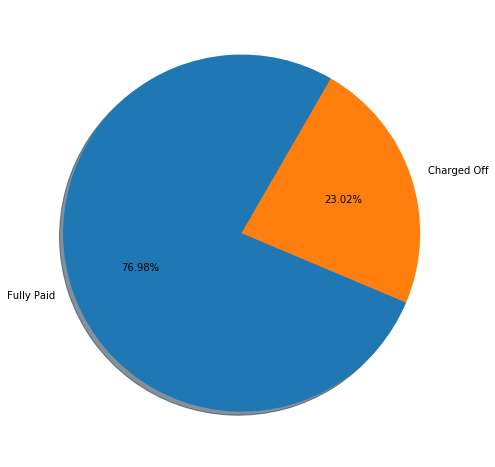

In [167]:
value=[curr_p,curr_c]

fig1, ax1 = plt.subplots(figsize=(8,10))

ax1.pie(value,labels=['Fully Paid','Charged Off'],autopct='%1.2f%%',
        shadow=True, startangle=60)

plt.show()
#curr_t